# Diffusivity - 11032021 - 14

![](data\project_z_max_11032021_14.jpg)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import trackpy as tp
from skimage import io
from corrLib import readdata, xy_bin
from xiaolei.chain.tracking import gauss1
from scipy.optimize import curve_fit
from myImageLib import bestcolor, dirrec
from utils import *
import dufte
plt.style.use('default')
from scipy.signal import savgol_filter
from IPython.display import clear_output

## Sparce trajectory analysis

In [13]:
folder = r'C:\Users\liuzy\Documents\Data\DE\11032021\Analysis\14'
traj = pd.read_csv(os.path.join(folder, 'traj_50.csv'))
t = traj.assign(frame=traj.index, particle=0)
msd = tp.msd(t, mpp=0.33, fps=1, max_lagtime=100)

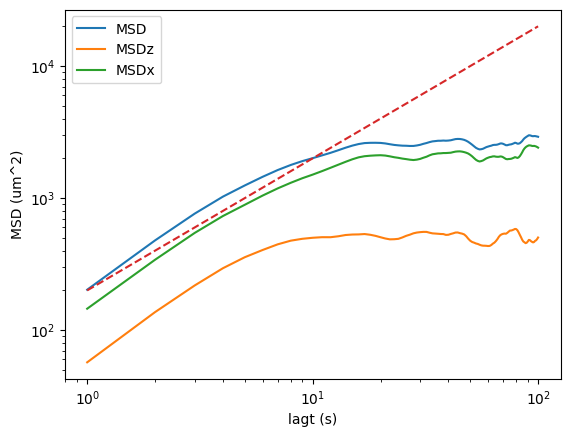

In [14]:
plt.plot(msd.lagt, msd.msd, label='MSD')
plt.plot(msd.lagt, msd['<x^2>'], label='MSDz')
plt.plot(msd.lagt, msd['<y^2>'], label='MSDx')
plt.loglog()
plt.plot(msd.lagt, 200*msd.lagt, ls='--')
plt.xlabel('lagt (s)')
plt.ylabel('MSD (um^2)')
plt.legend()

**Comments:** the MSD obtained from 600 points look ok. 600 more can potentially complete the short time regime. 

In [15]:
traj = pd.read_csv(os.path.join(folder, 'traj_1.csv'))
t = traj.assign(frame=traj.index, particle=0)

In [23]:
msd = tp.msd(t.dropna(), fps=50, mpp=0.33, max_lagtime=3000)

In [24]:
msd

,<x>,<y>,<x^2>,<y^2>,msd,lagt
lagt,,,,,,
1,0.002399,-0.009720,35.495264,5.634527,41.129791,0.02
2,0.004654,-0.020283,78.810834,17.227932,96.038765,0.04
3,0.008564,-0.032351,99.956953,29.006491,128.963444,0.06
4,0.007711,-0.044191,95.547725,38.904381,134.452106,0.08
5,0.004801,-0.056938,101.823738,48.658859,150.482597,0.10
...,...,...,...,...,...,...
2996,0.855060,-1.373776,438.040396,2908.126999,3346.167395,59.92
2997,0.863940,-1.370619,443.388559,2910.089492,3353.478051,59.94
2998,0.839944,-1.367718,431.326464,2912.060963,3343.387426,59.96


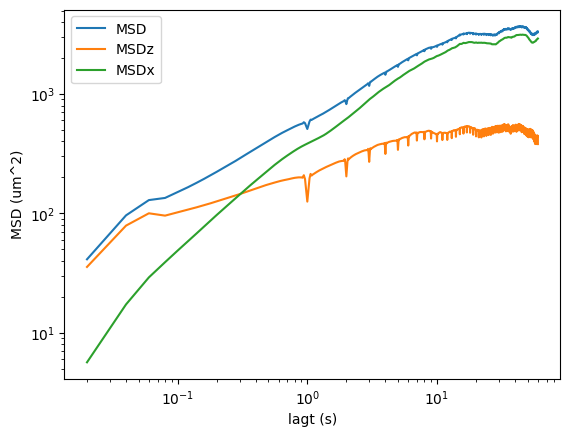

In [25]:
plt.plot(msd.lagt, msd.msd, label='MSD')
plt.plot(msd.lagt, msd['<x^2>'], label='MSDz')
plt.plot(msd.lagt, msd['<y^2>'], label='MSDx')
plt.loglog()
# plt.plot(msd.lagt, 200*msd.lagt, ls='--')
plt.xlabel('lagt (s)')
plt.ylabel('MSD (um^2)')
plt.legend()
# plt.xlim([0, 1])

In [26]:
t['x'] = savgol_filter(t['x'], 5, 3)
t['y'] = savgol_filter(t['y'], 5, 3)

In [29]:
msd = tp.msd(t.dropna(), fps=50, mpp=0.33, max_lagtime=3000)

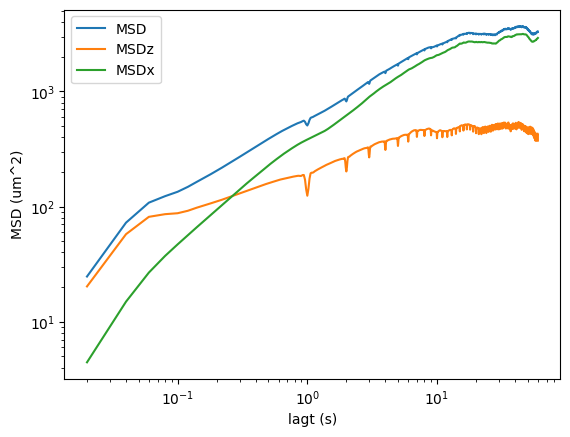

In [30]:
plt.plot(msd.lagt, msd.msd, label='MSD')
plt.plot(msd.lagt, msd['<x^2>'], label='MSDz')
plt.plot(msd.lagt, msd['<y^2>'], label='MSDx')
plt.loglog()
# plt.plot(msd.lagt, 200*msd.lagt, ls='--')
plt.xlabel('lagt (s)')
plt.ylabel('MSD (um^2)')
plt.legend()
# plt.xlim([0, 1])

In [21]:
image_folder = r'C:\Users\liuzy\Documents\Data\DE\11032021\14'
l = readdata(image_folder, 'tif')
save_folder = os.path.join(folder, 'tracking_quality')
if os.path.exists(save_folder) == False:
    os.makedirs(save_folder)
for num, i in l[25::50].iterrows():
    img = io.imread(i.Dir)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.imshow(img, cmap='gray')
    ax.scatter(t.x[num], t.y[num])
#     plt.pause(.5)
    clear_output(wait=True)
    fig.savefig(os.path.join(save_folder, i.Name+'.jpg'), dpi=50)
    plt.close()
    